<a href="https://colab.research.google.com/github/erinbugbee/2023CLIHC-SpeedyIBL-Workshop/blob/main/Solution_IowaGambling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Using SpeedyIBL for the Iowa Gambling Task

https://www.psytoolkit.org/experiment-library/igt.html

In the original paper (Bechera and colleagues, 1994), the following procedure was followed:

There were 4 decks of cards (A, B, C, and D)

Participants had to choose in total 100 cards, one at the time

Each time they choose a card, they get feedback about winning and/or loosing some money

Participants did not know what each card would yield in advance (i.e., like a lottery)

Participants started with a "loan" of $2000 and were told to make a profit

Decks A and B always yielded $100

Decks C and D always yielded $50

For each card chosen, there is a 50% chance of having to pay a penalty as well. For decks A and B, the penalty is \$250, whereas for decks C and D it is \$50.

In [8]:
%pip install -U speedyibl
from speedyibl import Agent

# Define an agent

agent = Agent(default_utility=110)

# Define options
options = ['A','B','C','D']

import random
# Define a reward function
def reward(choice):
    if choice == 'A' or choice =='B':
        r = 100
        if random.random() <= 0.5:
            r -= 250
    else:
        r = 50
        if random.random() <= 0.5:
            r -= 50
    return r

In [9]:
# Run experiments
import time # to calculate time
runs = 1000 # number of runs (participants)
trials = 100 # number of trials (episodes)


def run(agent,reward, n_runs,trials):
  average_p = [] # to store average of performance (proportion of maximum reward expectation choice)
  average_r = []
  average_time = [] # to save time
  for r in range(n_runs):
    pmax = []
    rewards = []
    ttime = [0]
    agent.reset() #clear the memory for a new run
    for i in range(trials):
      start = time.time()
      choice = agent.choose(options) # choose one option from the list of two
      # determine the reward that agent can receive
      re = reward(choice)
      # store the instance
      agent.respond(re)
      end = time.time()
      ttime.append(ttime[-1]+ end - start)
      pmax.append(choice == 'C' or choice == 'D')
      rewards.append(re)
    average_p.append(pmax) # save performance of each run
    average_r.append(rewards)
    average_time.append(ttime) # save time of each run
  return average_r, average_p

<ipython-input-4-f3b8075de123>:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(range(trials), np.mean(np.asarray(average_p),axis=0), 'o-', color='darkgreen', markersize=2, linestyle='--', label='speedyIBL')


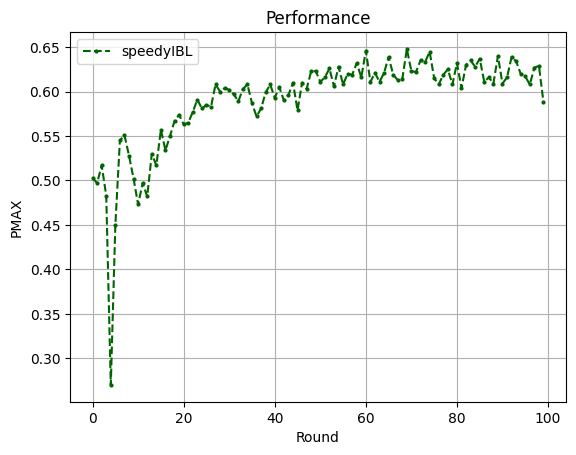

In [4]:
average_r, average_p = run(agent,reward, runs,trials)
import matplotlib.pyplot as plt
import numpy as np
plt.plot(range(trials), np.mean(np.asarray(average_p),axis=0), 'o-', color='darkgreen', markersize=2, linestyle='--', label='speedyIBL')
plt.xlabel('Round')
plt.ylabel('PMAX')
plt.title('Performance')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-5-d116ee08baf4>:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(range(trials), np.mean(np.asarray(average_r),axis=0), 'o-', color='darkgreen', markersize=2, linestyle='--', label='speedyIBL')


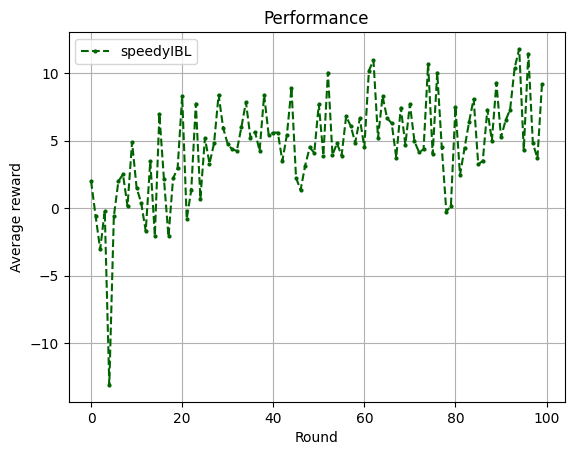

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(range(trials), np.mean(np.asarray(average_r),axis=0), 'o-', color='darkgreen', markersize=2, linestyle='--', label='speedyIBL')
plt.xlabel('Round')
plt.ylabel('Average reward')
plt.title('Performance')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-6-23c9e620d252>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(range(trials), np.mean(np.asarray(average_p),axis=0), 'o-', color='darkgreen', markersize=2, linestyle='--', label='speedyIBL')


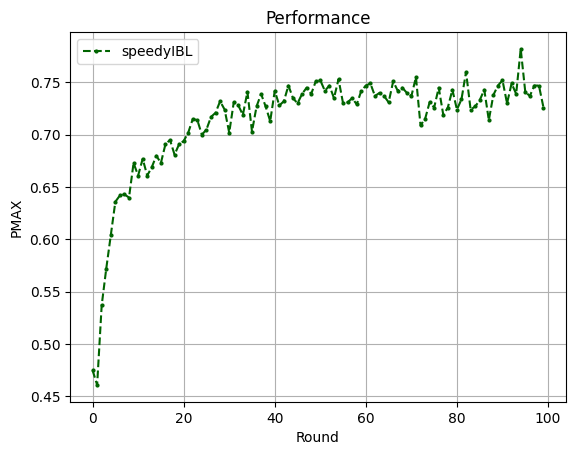

In [6]:
agent.default_utility = 10
average_r, average_p = run(agent,reward, runs,trials)

import matplotlib.pyplot as plt
import numpy as np
plt.plot(range(trials), np.mean(np.asarray(average_p),axis=0), 'o-', color='darkgreen', markersize=2, linestyle='--', label='speedyIBL')
plt.xlabel('Round')
plt.ylabel('PMAX')
plt.title('Performance')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-7-d116ee08baf4>:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(range(trials), np.mean(np.asarray(average_r),axis=0), 'o-', color='darkgreen', markersize=2, linestyle='--', label='speedyIBL')


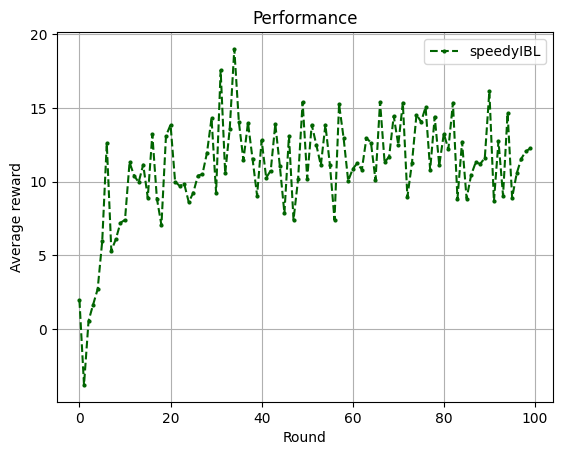

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(range(trials), np.mean(np.asarray(average_r),axis=0), 'o-', color='darkgreen', markersize=2, linestyle='--', label='speedyIBL')
plt.xlabel('Round')
plt.ylabel('Average reward')
plt.title('Performance')
plt.legend()
plt.grid(True)
plt.show()